In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
import pandas as pd

In [2]:
date_rng = ["20-02-2023","21-02-2023","22-02-2023","23-02-2023","24-02-2023",
            "25-02-2023","26-02-2023"]
sales_data = [20,55,67,35,87,98,45]

data = pd.DataFrame({'date' : date_rng,'sales':sales_data})
data = data.set_index('date')

scaler = MinMaxScaler()
data['sales'] = scaler.fit_transform(data['sales'].values.reshape(-1,1))
# print(data['sales'])

# split the data into traininig and testing sets
train_size = int(len(data)*0.7)
train_data,test_data = data[:train_size],data[train_size:]
print(train_size)
print(test_data)
print(train_data)

4
               sales
date                
24-02-2023  0.858974
25-02-2023  1.000000
26-02-2023  0.320513
               sales
date                
20-02-2023  0.000000
21-02-2023  0.448718
22-02-2023  0.602564
23-02-2023  0.192308


In [3]:

from sympy import sequence

#create sequence of data for training

def create_sequences(data,sequence_length):
    sequences, labels = [],[]
    for x in range(len(data) - sequence_length):
        sequence = data.iloc[x:x+sequence_length]['sales']
        target = data.iloc[x+sequence_length]['sales']
        sequences.append(sequence)
        labels.append(target)
        print("Sequences:{}".format(sequence))
        print("Labels :{}".format(target))
    return np.array(sequences), np.array(labels)


In [4]:
sequence_length = 1
x_train,y_train = create_sequences(train_data,sequence_length)
x_test, y_test = create_sequences(test_data,sequence_length)

#

Sequences:date
20-02-2023    0.0
Name: sales, dtype: float64
Labels :0.4487179487179487
Sequences:date
21-02-2023    0.448718
Name: sales, dtype: float64
Labels :0.6025641025641025
Sequences:date
22-02-2023    0.602564
Name: sales, dtype: float64
Labels :0.1923076923076923
Sequences:date
24-02-2023    0.858974
Name: sales, dtype: float64
Labels :1.0
Sequences:date
25-02-2023    1.0
Name: sales, dtype: float64
Labels :0.3205128205128205


In [8]:
#Build LSTMM MODEL 

from pickletools import optimize
model = Sequential()
model.add(LSTM(100,activation='relu', input_shape=(sequence_length,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [6]:
#Train the model

model.fit(x_train, y_train,epochs=500,batch_size=2)

Epoch 1/500
2/2 [==============================] - 4s 15ms/step - loss: 0.2009
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 0.1958
Epoch 3/500
2/2 [==============================] - 0s 12ms/step - loss: 0.1910
Epoch 4/500
2/2 [==============================] - 0s 12ms/step - loss: 0.1855
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 0.1818
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 0.1772
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 0.1728
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1679
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1646
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1603
Epoch 11/500
2/2 [==============================] - 0s 23ms/step - loss: 0.1565
Epoch 12/500
2/2 [==============================] - 0s 10ms/step - loss: 0.1523
Epoch 13/500
2/2 [==============================] - 0

1/1 [==============================] - 0s 253ms/step



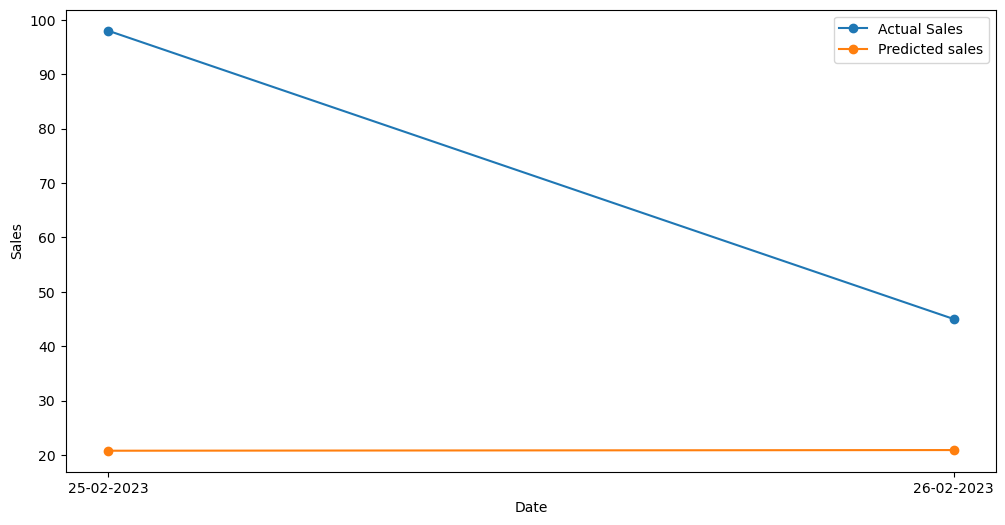

In [9]:
#Make prediction

from cProfile import label
from cgi import test
from matplotlib import markers
from numpy import reshape

type(x_test)
predicted_sales = model.predict(x_test)
predicted_sales = scaler.inverse_transform(predicted_sales)
actual_sales = scaler.inverse_transform(test_data["sales"][sequence_length:].to_numpy().reshape(-1,1))
print()

plt.figure(figsize=(12,6))
plt.plot(test_data.index[sequence_length:], actual_sales,label='Actual Sales',marker ='o')
plt.plot(test_data.index[sequence_length:], predicted_sales,label='Predicted sales',marker ='o')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()